In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt

C:\Users\Swati\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
import os
print(os.listdir("../embeddings"))

['glove.840B.300d', 'GoogleNews-vectors-negative300', 'paragram_300_sl999', 'wiki-news-300d-1M']


In [ ]:
'../embeddings/glove.840B.300d/glove.840B.300d.txt'

In [3]:
import os
print(os.listdir('../glove.840B.300d/glove.840B.300d.txt'))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../glove.840B.300d/glove.840B.300d.txt'

In [2]:
test_data = pd.read_csv('test.csv')

In [3]:
test_data.shape

(375806, 2)

In [4]:
test_data.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [36]:
test_data.head()

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?


In [5]:
train_data = pd.read_csv('train.csv')

In [6]:
train_data.shape

(1306122, 3)

In [7]:
train_data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [8]:
train_data['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [9]:
train_data[train_data.isnull().any(axis=1)]

,qid,question_text,target


In [10]:
print(np.max(train_data['question_text'].apply(lambda x: len(x.split()))))

134


Text(0.5, 1.0, 'Distribution of question word length, scale: log')

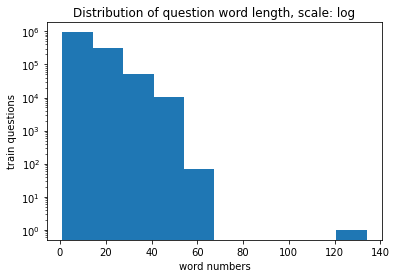

In [11]:
train_data['question_text'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.xlabel('word numbers')
plt.ylabel('train questions')
plt.title('Distribution of question word length, scale: log')

Text(0.5, 1.0, 'Distribution of question word length, scale: log')

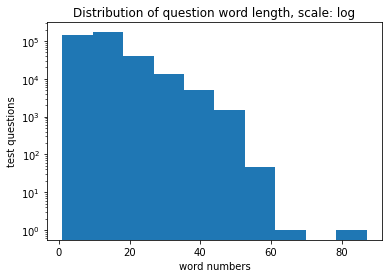

In [12]:
test_data['question_text'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.xlabel('word numbers')
plt.ylabel('test questions')
plt.title('Distribution of question word length, scale: log')

In [13]:
print('Average word length of train data: {0:.0f}.'.format(np.mean(train_data['question_text'].apply(lambda x: len(x.split())))))
print('Average word length of test data: {0:.0f}.'.format(np.mean(test_data['question_text'].apply(lambda x: len(x.split())))))

Average word length of train data: 13.
Average word length of test data: 13.


In [14]:
print('Max word length of train data: {0:.0f}.'.format(np.max(train_data['question_text'].apply(lambda x: len(x.split())))))
print('Max word length of test data: {0:.0f}.'.format(np.max(test_data['question_text'].apply(lambda x: len(x.split())))))

Max word length of train data: 134.
Max word length of test data: 87.


In [15]:
def build_vocab(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [16]:
sentences = train_data["question_text"].progress_apply(lambda x: x.split()).values
vocab = build_vocab(sentences)
print({k: vocab[k] for k in list(vocab)[:5]})


100%|██████████| 1306122/1306122 [00:03<00:00, 422977.87it/s]

{'How': 261930, 'did': 33489, 'Quebec': 97, 'nationalists': 91, 'see': 9003}
